## ***Name : `Fawad Ali Shaikh`***
## ***Course : `Data Science`***

## ***Exploratory Data Analysis `(EDA)`***

### ***`Import` `Libraries`***

In [139]:
# To handle data
import pandas as pd
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")



In [140]:
# Load dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [141]:
# Shape of dataset

df.shape

(891, 15)

In [142]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 891
Number of columns: 15


In [143]:
# Columns' name in the dataset

df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [144]:
# Information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [145]:
# Summary

df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [146]:
# Unique values

df.nunique()

,0
survived,2
pclass,3
sex,2
age,88
sibsp,7
parch,7
fare,248
embarked,3
class,3
who,3


In [147]:
# Null Values

print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [148]:
# Null Values in %
print((df.isnull().sum()/len(df)) * 100)


survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [149]:
print(f'So we have {df["age"].isnull().sum()} null values in age, {df["deck"].isnull().sum()} in deck, {df["embarked"].isnull().sum()} in embarked and {df["embark_town"].isnull().sum()} in the embark_town.')

So we have 177 null values in age, 688 in deck, 2 in embarked and 2 in the embark_town.


<Axes: >

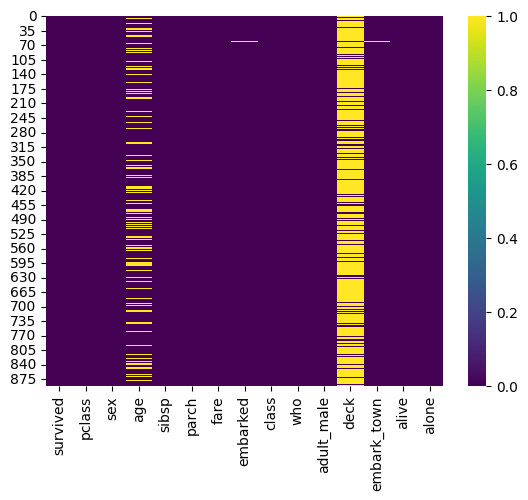

In [150]:
# Heatmap of missing values

sns.heatmap(df.isnull(), cmap='viridis')

## ***Let's Remove `Null Values`***

In [151]:
# Remove deck column

df.drop('deck', axis=1, inplace=True)
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [152]:
# Impute missing values in fare & age column

df['fare'].fillna(df['fare'].median(), inplace=True)
df['age'].fillna(df['age'].median(), inplace=True)


In [153]:
# Impute missing values in embarked & embark_town column

df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
df['embark_town'].fillna(df['embark_town'].mode()[0], inplace=True)

In [154]:
# Null Values

print(df.isnull().sum())

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64


<Axes: >

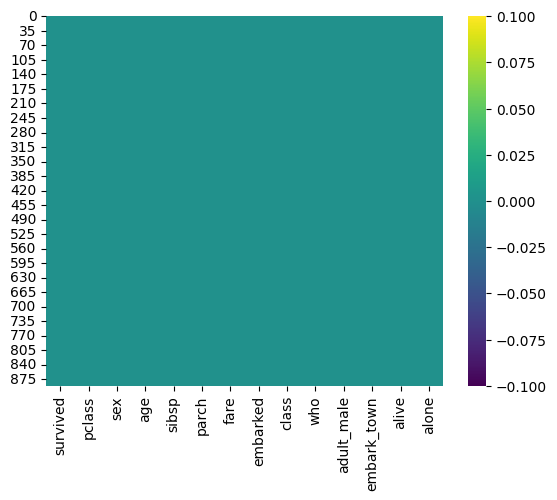

In [155]:
# Heatmap of missing values

sns.heatmap(df.isnull(), cmap='viridis')

*So, we have remove `null values` from the dataset.*

In [156]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


### ***Let's do some `tasks`***

In [157]:
# Suvival rate based on sex

df.groupby('sex')['survived'].value_counts()

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

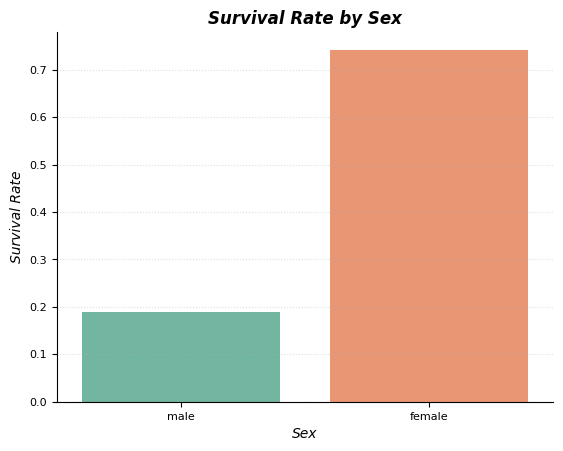

In [158]:
# Bar plot

sns.barplot(x='sex', y='survived', data=df, palette='Set2',ci=None)

plt.title('Survival Rate by Sex', fontsize=12, fontweight='bold',fontstyle='italic')
plt.xlabel('Sex', fontsize=10, fontstyle='italic')
plt.ylabel('Survival Rate', fontsize=10, fontstyle='italic')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.despine()
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.show()

*This shows that survival rate of `females` are greter than `males'` survival rate.*

In [159]:
# Suvival rate based on class

df.groupby('class')['survived'].value_counts()

class   survived
First   1           136
        0            80
Second  0            97
        1            87
Third   0           372
        1           119
Name: count, dtype: int64

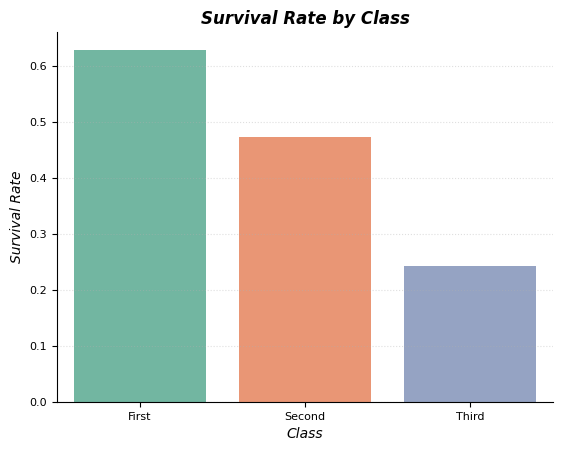

In [160]:
# Bar plot

sns.barplot(x='class', y='survived', data=df, palette='Set2',ci=None)

plt.title('Survival Rate by Class', fontsize=12, fontweight='bold',fontstyle='italic')
plt.xlabel('Class', fontsize=10, fontstyle='italic')
plt.ylabel('Survival Rate', fontsize=10, fontstyle='italic')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.despine()
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.show()

*This shows that `First Class` has higher survival rate than rest of them & `Second class` has higher survival rate than `Third`.*

### ***Survival Rate by `age`, we have to do `binning`***

In [161]:
# Binning

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['Kids', 'Teenagers', 'Youngs', 'Adults', 'Middle Aged', 'Seniors', 'Old', 'Very Old']
df['age_group'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)


In [162]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Adults
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Adults
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Adults


In [163]:
# Value Counts of age group

df['age_group'].value_counts()

,count
age_group,
Youngs,407
Adults,155
Teenagers,115
Middle Aged,86
Kids,64
Seniors,42
Old,17
Very Old,5


*This shows number of every age group like `Teenagers` are 115, `Seniors` are 42 etc.*

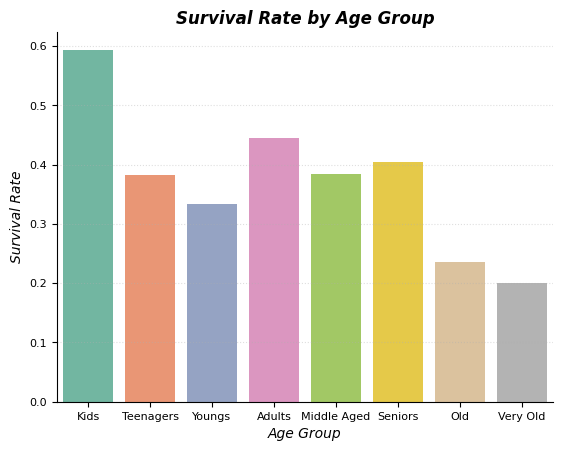

In [164]:
# Bar plot

sns.barplot(x='age_group', y='survived', data=df, palette='Set2', ci=None)

plt.title('Survival Rate by Age Group', fontsize=12, fontweight='bold',fontstyle='italic')
plt.xlabel('Age Group', fontsize=10, fontstyle='italic')
plt.ylabel('Survival Rate', fontsize=10, fontstyle='italic')
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
sns.despine()
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.show()

*This shows that `Kids` Survival rate is higher than rests & also `Middle Aged` and `Seniors` has higher suvival rate than rest of them.*

In [165]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_group
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False,Youngs
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False,Adults
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True,Youngs
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False,Adults
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True,Adults


In [170]:
# Calculate survival rates for passengers traveling alone and with family

survival_rate_alone = df[df['alone'] == True]['survived'].mean()
survival_rate_with_family = df[df['alone'] == False]['survived'].mean()

print(f"Survival Rate (Alone): {survival_rate_alone:}")
print(f"Survival Rate (With Family): {survival_rate_with_family:}")


Survival Rate (Alone): 0.30353817504655495
Survival Rate (With Family): 0.5056497175141242


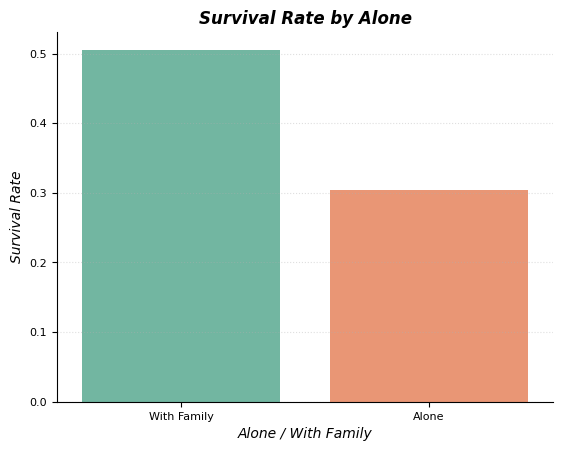

In [172]:
# Bar plot

sns.barplot(x='alone', y='survived', data=df, palette='Set2', ci=None)

plt.title('Survival Rate by Alone', fontsize=12, fontweight='bold',fontstyle='italic')
plt.xlabel('Alone / With Family', fontsize=10, fontstyle='italic')
plt.ylabel('Survival Rate', fontsize=10, fontstyle='italic')
plt.xticks([0, 1], ['With Family', 'Alone'],fontsize=8)
plt.yticks(fontsize=8)
sns.despine()
plt.grid(axis='y', linestyle=':', alpha=0.4)
plt.show()

*This shows that Passengers traveling `alone` had a lower survival rate compared to those traveling with `family`.*